In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset/data
!kaggle datasets download -d sriharshaeedala/financial-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset
License(s): CC-BY-SA-4.0
financial-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip financial-fraud-detection-dataset.zip

Archive:  financial-fraud-detection-dataset.zip
replace Synthetic_Financial_datasets_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pickle


In [ ]:
df =pd.read_csv("/content/Synthetic_Financial_datasets_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(6362620, 4)

# Statistical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
def summary(df):
    table_info=pd.DataFrame(df.dtypes,columns=['dtypes'])
    table_info['missing']=df.isnull().sum()
    table_info['missing Ratio']=(df.isnull().sum()/df.shape[0])*100
    table_info['count']=df.count()
    table_info['uniques'] = df.nunique().values
    desc = pd.DataFrame(df.describe().T)
    table_info['min'] = desc['min']
    table_info['max'] = desc['max']
    table_info['mean'] = desc['mean']
    return table_info
summary(df).style.background_gradient(cmap='YlOrRd')

,dtypes,missing,missing Ratio,count,uniques,min,max,mean
step,int64,0,0.000000,6362620,743,1.000000,743.000000,243.397246
type,object,0,0.000000,6362620,5,nan,nan,nan
amount,float64,0,0.000000,6362620,5316900,0.000000,92445516.640000,179861.903549
nameOrig,object,0,0.000000,6362620,6353307,nan,nan,nan
oldbalanceOrg,float64,0,0.000000,6362620,1845844,0.000000,59585040.370000,833883.104074
newbalanceOrig,float64,0,0.000000,6362620,2682586,0.000000,49585040.370000,855113.668579
nameDest,object,0,0.000000,6362620,2722362,nan,nan,nan
oldbalanceDest,float64,0,0.000000,6362620,3614697,0.000000,356015889.350000,1100701.666520
newbalanceDest,float64,0,0.000000,6362620,3555499,0.000000,356179278.920000,1224996.398202
isFraud,int64,0,0.000000,6362620,2,0.000000,1.000000,0.001291


In [ ]:
missing=df.isnull().sum()
missing_Ratio=df.isnull().sum() /df.shape[0]
null_values=pd.concat([missing,missing_Ratio],axis=1,keys=['missing','missing_Ratio'])
null_values

,missing,missing_Ratio
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


# EDA

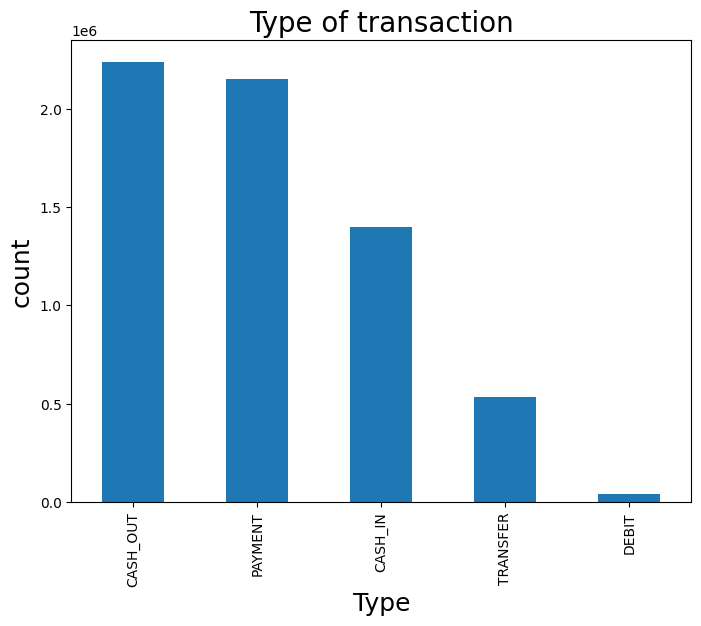

In [ ]:
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction', fontsize = 20)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()

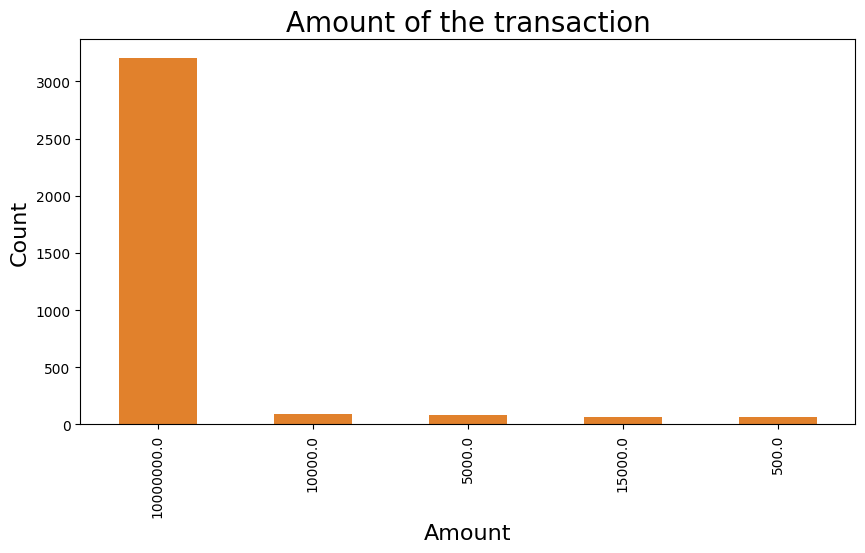

In [ ]:
# Transaction amount
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',color=["#E1812C"])
plt.title("Amount of the transaction", fontsize = 20)
plt.xlabel('Amount', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [ ]:
df.groupby('type').count()['amount']

,amount
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


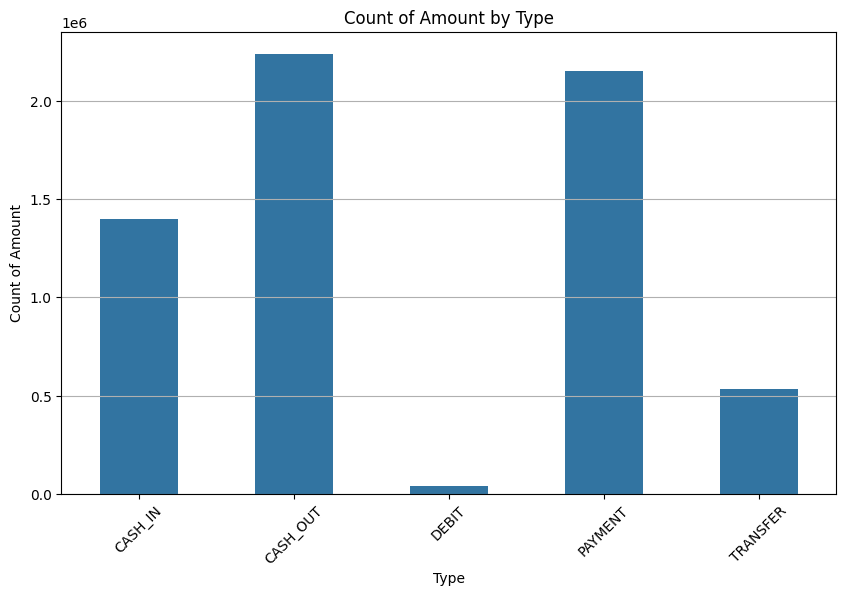

In [ ]:
count_data = df.groupby('type').count()['amount']

# Plotting
plt.figure(figsize=(10, 6))
count_data.plot(kind='bar', color='#3274A1')
plt.title('Count of Amount by Type')
plt.xlabel('Type')
plt.ylabel('Count of Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

In [ ]:
numeric_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

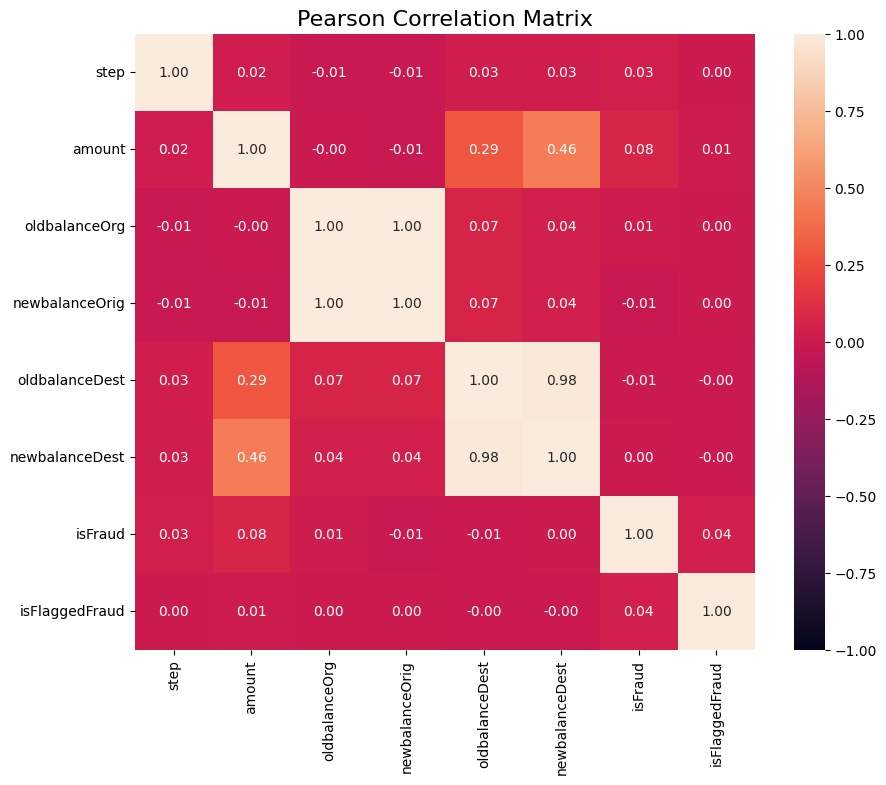

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
print(f"correlation between all features and Class \n{(correlation['isFraud'].sort_values(ascending=False))}")

correlation between all features and Class 
isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


<ipython-input-49-22debf27b398>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlation.index, y=target_correlation.values, palette=colors)


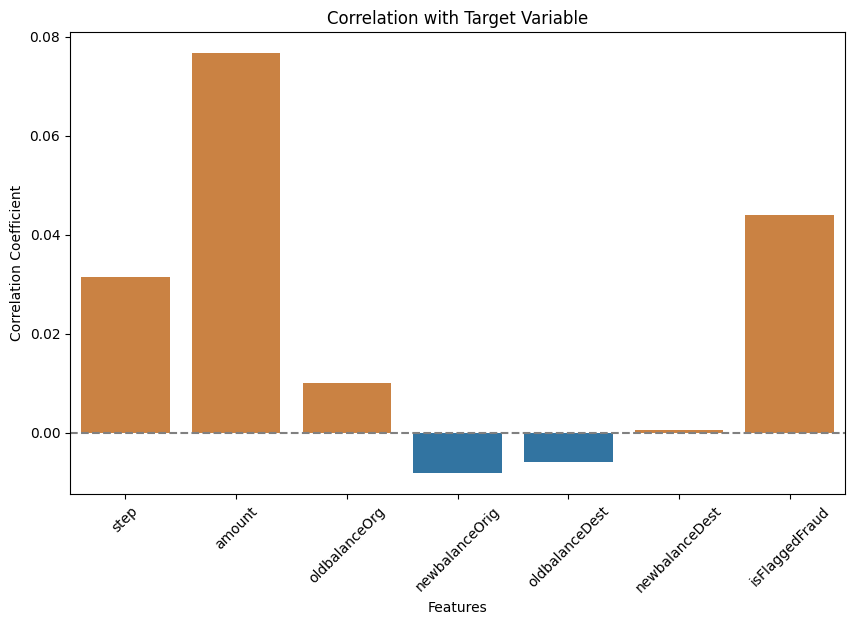

In [ ]:
target_correlation = correlation['isFraud'].drop('isFraud')

colors = ['#E1812C' if value > 0 else '#1f77b4' for value in target_correlation]

plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette=colors)
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [ ]:
threshold= 0.02
features=target_correlation[abs(target_correlation) >= threshold].index

In [ ]:
features=features[:2]

In [ ]:
copy_df=df[features].join(df['type'])
df=copy_df.join(df['isFraud'])
df.head()

,step,amount,type,isFraud
0,1,9839.64,PAYMENT,0
1,1,1864.28,PAYMENT,0
2,1,181.00,TRANSFER,1
3,1,181.00,CASH_OUT,1
4,1,11668.14,PAYMENT,0


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


imbalanced data

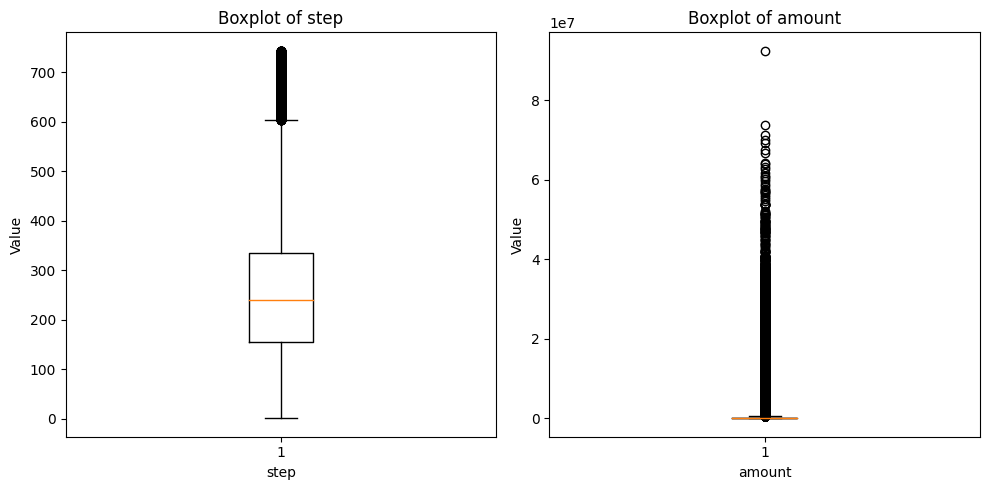

In [ ]:
col_outliers = ['step', 'amount']
fig, axes = plt.subplots(nrows=1, ncols=len(col_outliers), figsize=(10, 5))
for count, col in enumerate(col_outliers):
    axes[count].boxplot(df[col])
    axes[count].set_title(f'Boxplot of {col}')
    axes[count].set_xlabel(col)
    axes[count].set_ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
# Encode the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# Separate feature variables and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Split the data into train (80%), validation (10%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
X_train.shape

(5090096, 3)

In [ ]:
# Initialize SMOTE and apply it to the training data only
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape

(10167052, 3)

In [ ]:
data = pd.DataFrame(X_train_smote)
data.head()

,0,1,2
0,-1.604680,-0.281436,0.952399
1,-1.569551,-0.286503,0.952399
2,-0.087101,0.300319,-0.528954
3,-0.051972,-0.286124,0.952399
4,-0.705374,0.063190,-1.269631


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
import pickle

# Save datasets
with open('X_train_smote.pkl', 'wb') as f:
    pickle.dump(X_train_smote, f)import pickle

# Save datasets
with open('X_train_smote.pkl', 'wb') as f:
    pickle.dump(X_train_smote, f)
with open('X_val.pkl', 'wb') as f:
    pickle.dump(X_val, f)
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_train_smote.pkl', 'wb') as f:
    pickle.dump(y_train_smote, f)
with open('y_val.pkl', 'wb') as f:
    pickle.dump(y_val, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)